In [25]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
# file path
file_path = "/content/drive/MyDrive/combined_final_fda.txt"

# reading the data
data = pd.read_csv(file_path, delimiter='|', encoding='latin1', on_bad_lines='skip')

# displaying first few rows of the data frame
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-25-41929805a66b>:9: DtypeWarning: Columns (0,1,9,11,15,16,23,25,27,29,33,34,40,46,47,49,53,56,57,59,60,61,62,63,65,66,67,68,69,70,71,72,73,74,75,79,81,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,106,108) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, delimiter='|', encoding='latin1', on_bad_lines='skip')


,MDR_REPORT_KEY,DEVICE_SEQUENCE_NO,DATE_RECEIVED,BRAND_NAME,GENERIC_NAME,MANUFACTURER_D_NAME,MANUFACTURER_D_ADDRESS_1,MANUFACTURER_D_CITY,MANUFACTURER_D_STATE_CODE,MANUFACTURER_D_ZIP_CODE,...,SOURCE_TYPE,DATE_ADDED,DATE_CHANGED,REPORTER_COUNTRY_CODE,PMA_PMN_NUM,EXEMPTION_NUMBER,SUMMARY_REPORT,NOE_SUMMARIZED,SUPPL_DATES_FDA_RECEIVED,SUPPL_DATES_MFR_RECEIVED
0,13142031,1,2022/01/03,MED-EL MAESTRO COCHLEAR IMPLANT SYSTEM,COCHLEAR IMPLANT,MED-EL ELEKTROMEDIZINISCHE GERAETE GMBH,NaN,INNSBRUCK,NaN,NaN,...,07,01/03/2022,02/01/2024,TC,P000025,NaN,N,1,05/23/2022;01/17/2023,01/03/2022;01/03/2022
1,13142031,1,2022/01/03,MED-EL MAESTRO COCHLEAR IMPLANT SYSTEM,COCHLEAR IMPLANT,MED-EL ELEKTROMEDIZINISCHE GERAETE GMBH,NaN,INNSBRUCK,NaN,NaN,...,07,01/03/2022,02/01/2024,TC,P000025,NaN,N,1,05/23/2022;01/17/2023,01/03/2022;01/03/2022
2,13142031,1,2022/01/03,MED-EL MAESTRO COCHLEAR IMPLANT SYSTEM,COCHLEAR IMPLANT,MED-EL ELEKTROMEDIZINISCHE GERAETE GMBH,NaN,INNSBRUCK,NaN,NaN,...,07,01/03/2022,02/01/2024,TC,P000025,NaN,N,1,05/23/2022;01/17/2023,01/03/2022;01/03/2022
3,13142031,1,2022/01/03,MED-EL MAESTRO COCHLEAR IMPLANT SYSTEM,COCHLEAR IMPLANT,MED-EL ELEKTROMEDIZINISCHE GERAETE GMBH,NaN,INNSBRUCK,NaN,NaN,...,07,01/03/2022,02/01/2024,TC,P000025,NaN,N,1,05/23/2022;01/17/2023,01/03/2022;01/03/2022
4,13142031,1,2022/01/03,MED-EL MAESTRO COCHLEAR IMPLANT SYSTEM,COCHLEAR IMPLANT,MED-EL ELEKTROMEDIZINISCHE GERAETE GMBH,NaN,INNSBRUCK,NaN,NaN,...,07,01/03/2022,02/01/2024,TC,P000025,NaN,N,1,05/23/2022;01/17/2023,01/03/2022;01/03/2022


In [23]:
# checking for missing values in the important columns
missing_values = data[['MDR_REPORT_KEY', 'DATE_RECEIVED', 'FOI_TEXT']].isna().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
MDR_REPORT_KEY    0
DATE_RECEIVED     0
FOI_TEXT          0
dtype: int64


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27173 entries, 0 to 27172
Columns: 111 entries, MDR_REPORT_KEY to SUPPL_DATES_MFR_RECEIVED
dtypes: object(111)
memory usage: 23.0+ MB


In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
import string
from collections import Counter

# downloding NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')



# function to preprocess text
def preprocess_text(text):
    # converting text to lowercase
    text = text.lower()

    # tokeniing
    tokens = word_tokenize(text)

    # stopwords, punctuation, and special characters removal
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

    # words lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens

# text preprocessing application
data['CLEAN_TEXT'] = data['FOI_TEXT'].apply(preprocess_text)

# flattening the list of tokens
all_tokens = [token for tokens in data['CLEAN_TEXT'] for token in tokens]

# countinh the frequency of each token
token_counts = Counter(all_tokens)

# removing tokens that appear less than 10 times
filtered_tokens = {token: count for token, count in token_counts.items() if count >= 10}

# function to filter out infrequent tokens
def filter_tokens(tokens):
    return [token for token in tokens if token in filtered_tokens]

# applying token filtering
data['FILTERED_TEXT'] = data['CLEAN_TEXT'].apply(filter_tokens)

# function to extract unigrams and bigrams
def extract_ngrams(tokens):
    unigrams = tokens
    bigrams = list(ngrams(tokens, 2))
    return unigrams + bigrams

# applying ngram extraction
data['NGRAMS'] = data['FILTERED_TEXT'].apply(extract_ngrams)

# function to remove very short and long words
def filter_word_length(tokens):
    return [token for token in tokens if len(token) > 1 and len(token) < 20]

# applying word length filtering
data['FINAL_TEXT'] = data['FILTERED_TEXT'].apply(filter_word_length)

# printing the processed text for review
for i, row in data.iterrows():
    print(f"Original Text: {row['FOI_TEXT']}")
    print(f"Processed Text: {' '.join(row['FINAL_TEXT'])}\n")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Streaming output truncated to the last 5000 lines.
Processed Text: recipient reportedly experiencing decreased performance review recipient test data indicates impedance issue programming adjustment made however issue resolve revision surgery scheduled

Original Text: THE RECIPIENT'S DEVICE WAS EXPLANTED. THE RECIPIENT WAS REIMPLANTED WITH ANOTHER ADVANCED BIONICS COCHLEAR DEVCIE. DISCLAIMER: ADVANCED BIONICS DOES NOT INTEND THAT THIS REPORT BE ANY ADMISSION OF LIABILITY, FAULT OR PRODUCT DEFECT.
Processed Text: recipient device explanted recipient reimplanted another advanced bionics cochlear disclaimer advanced bionics intend report admission liability fault product defect

Original Text: ADVANCED BIONICS CONSIDERS THE INVESTIGATION INTO THIS REPORTABLE EVENT AS CLOSED. THE EXTERNAL VISUAL INSPECTION REVEALED SLICED SILICONE OVERMOLD ON THE TOP AND BOTTOM COVERS, AS WELL AS A SEVERED ELECTRODE. THIS IS BELIEVED TO HAVE OCCURRED DURING REVISION SURGERY. THE DEVICE PASSED PHOTOGRAPHIC 

In [ ]:
# keywords for adverse events
adverse_event_keywords = ['swelling','device failure'
,'mastoiditis', 'headaches',' hematoma',
' otitis media','seroma','electrode extrusion',
'facial palsy','broken electrode','taste disturbances'
,'taste problems','device rejection','severed electrode'
, 'tympanic membrane perforation','cholesteatoma'
, 'death','skin infection','infection', 'trauma', 'meningitis'
, 'cerebrospinal leakage', 'dizziness', 'injury','external ear infection','middle ear infection','tinnitus', 'numbness','device migration','flap infection'
,'ear infection','flap swelling', 'electrode slip out','balance problem ', 'passed away','deceased', 'expired', 'died', 'demise']

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# function to identify adverse events
def identify_adverse_events(text):
    adverse_events = []
    text_lower = text.lower()
    for keyword in adverse_event_keywords:
        if keyword in text_lower:
            adverse_events.append(keyword)
    return adverse_events

# applying adverse event identification
data['ADVERSE_EVENTS'] = data['FOI_TEXT'].apply(identify_adverse_events)

# printing the identified adverse events
for i, row in data.iterrows():
    print(f"Original Text: {row['FOI_TEXT']}")
    print(f"Identified Adverse Events: {', '.join(row['ADVERSE_EVENTS'])}\n")



Streaming output truncated to the last 5000 lines.
Identified Adverse Events: 

Original Text: THE RECIPIENT'S DEVICE WAS EXPLANTED. THE RECIPIENT WAS REIMPLANTED WITH ANOTHER ADVANCED BIONICS COCHLEAR DEVCIE. DISCLAIMER: ADVANCED BIONICS DOES NOT INTEND THAT THIS REPORT BE ANY ADMISSION OF LIABILITY, FAULT OR PRODUCT DEFECT.
Identified Adverse Events: 

Original Text: ADVANCED BIONICS CONSIDERS THE INVESTIGATION INTO THIS REPORTABLE EVENT AS CLOSED. THE EXTERNAL VISUAL INSPECTION REVEALED SLICED SILICONE OVERMOLD ON THE TOP AND BOTTOM COVERS, AS WELL AS A SEVERED ELECTRODE. THIS IS BELIEVED TO HAVE OCCURRED DURING REVISION SURGERY. THE DEVICE PASSED PHOTOGRAPHIC IMAGING INSPECTION. SYSTEM LOCK WAS VERIFIED. THE CONDITION OF THE ELECTRODE PREVENTED AN ELECTRICAL TEST FROM BEING PERFORMED. THE DEVICE PASSED SOME OF THE ELECTRICAL TESTS PERFORMED. THE FAILURE OF THIS DEVICE IS ATTRIBUTED TO AN ELECTRODE SHORT IN THE ELECTRODE POCKET. A CORRECTIVE ACTION WAS IMPLEMENTED. THIS VERSION OF T

<Figure size 1200x600 with 0 Axes>

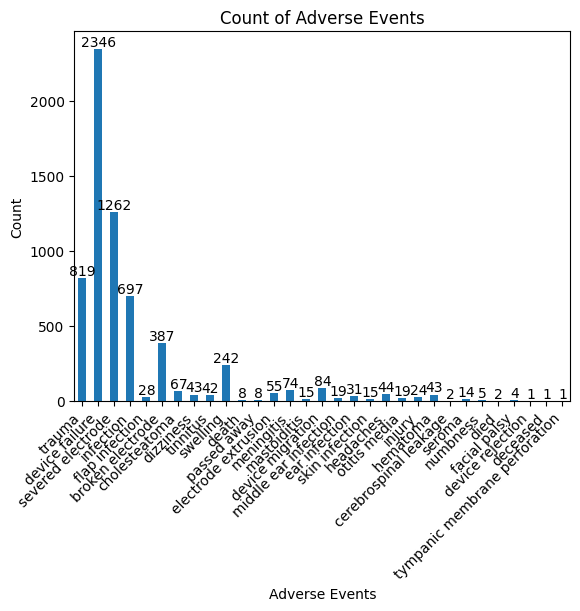

In [ ]:
# counting the frequency of each adverse event
all_adverse_events = [event for sublist in data['ADVERSE_EVENTS'] for event in sublist]
adverse_event_counts = Counter(all_adverse_events)

# creating a data frame for plotting
adverse_event_df = pd.DataFrame.from_dict(adverse_event_counts, orient='index', columns=['Count'])

# plotting the bar graph
plt.figure(figsize=(12, 6))
ax = adverse_event_df.plot(kind='bar', legend=False)
plt.title('Count of Adverse Events')
plt.xlabel('Adverse Events')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

for i in ax.containers:
    ax.bar_label(i, label_type="edge")

plt.show()

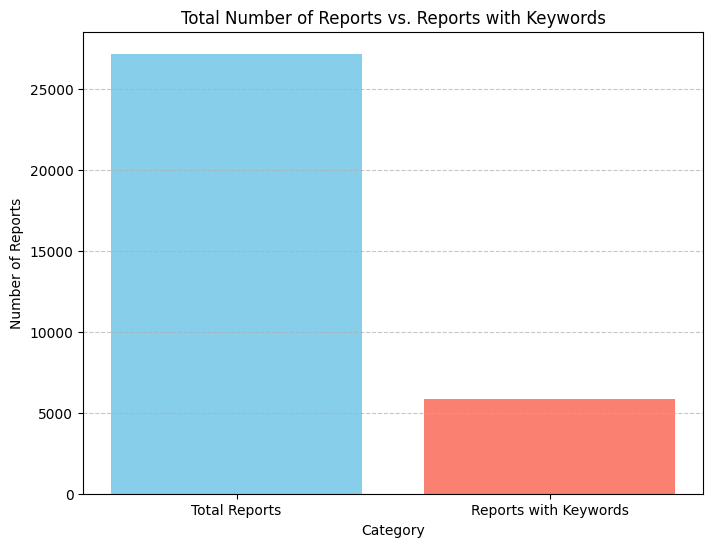

In [ ]:

# number of reports
total_reports = len(data)

# counting the number of reports with any adverse event
reports_with_adverse_events = data['ADVERSE_EVENTS'].apply(lambda x: len(x) > 0).sum()

# data for plotting
plot_data = pd.DataFrame({
    'Category': ['Total Reports', 'Reports with Keywords'],
    'Count': [total_reports, reports_with_adverse_events]
})

# bar graph
plt.figure(figsize=(8, 6))
plt.bar(plot_data['Category'], plot_data['Count'], color=['skyblue', 'salmon'])
plt.xlabel('Category')
plt.ylabel('Number of Reports')
plt.title('Total Number of Reports vs. Reports with Keywords')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
print(reports_with_adverse_events)

5875


In [ ]:
import pandas as pd

# death-related keywords
death_keywords = ['passed away', 'deceased', 'expired', 'died', 'demise', 'death']

# function to check if any of the death related keywords are present in the list of adverse events
def contains_death_keywords(events, keywords):
    return any(keyword in event.lower() for event in events for keyword in keywords)

# filtering reports with death related adverse events
reports_with_death_keywords = data[data['ADVERSE_EVENTS'].apply(lambda x: contains_death_keywords(x, death_keywords))]

# selecting only the MDR_REPORT_KEY and the original text columns
death_reports_info = reports_with_death_keywords[['MDR_REPORT_KEY', 'FOI_TEXT']]

# filtered information
pd.set_option('display.max_colwidth', None)
print(death_reports_info)



      MDR_REPORT_KEY  \
476         13259063   
4627        14459603   
4944        14519819   
10478       15659075   
10480       15659075   
19102       17018383   
19753       17128099   
20820       17290026   
22020       17491350   
23644       17823488   
25359       18105176   
25629       18142103   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 FOI_TEXT  
476                                                                      ADVANCED BIONICS CONSIDERS THE INVESTIGATION INTO THIS REPORTABLE EVENT AS CLOSED. THE RECIPIENT WILL REPORTEDLY NOT PURSUE REVISION SURGE

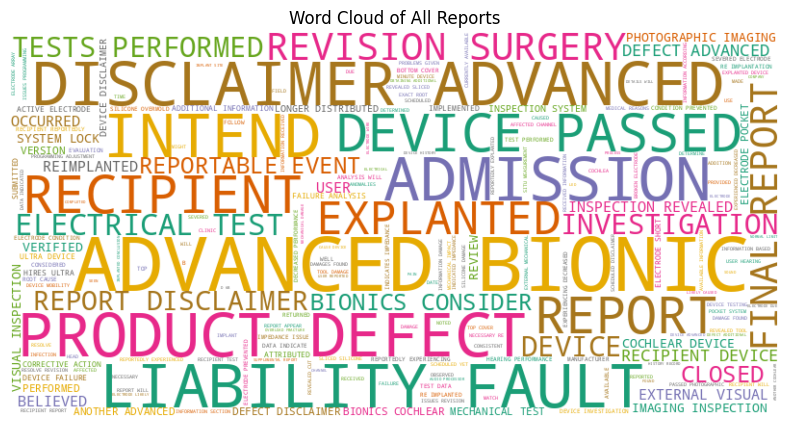

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# combining the text from all reports
combined_text_all = ' '.join(data['FOI_TEXT'].tolist())

# create and configure the word cloud
wordcloud_all = WordCloud(width=800, height=400, background_color='white', colormap='Dark2').generate(combined_text_all)

# word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Reports')
plt.show()


In [ ]:
from collections import defaultdict
# mapping keywords to categories
adverse_event_categories = {
    'device failure': 'Device Problems',
    'broken electrode': 'Device Problems',
    'severed electrode': 'Device Problems',
    'electrode extrusion': 'Device Problems',
    'device migration': 'Device Problems',
    'device rejection': 'Device Problems',
    'skin infection': 'Infections',
    'external ear infection': 'Infections',
    'middle ear infection': 'Infections',
    'ear infection': 'Infections',
    'flap infection': 'Infections',
    'mastoiditis': 'Infections',
    'otitis media': 'Infections',
    'meningitis': 'Infections',
    'infection': 'Infections',
    'swelling': 'Symptoms',
    'headaches': 'Symptoms',
    'dizziness': 'Symptoms',
    'tinnitus': 'Symptoms',
    'numbness': 'Symptoms',
    'taste disturbances': 'Symptoms',
    'taste problems': 'Symptoms',
    'trauma': 'Surgical/Trauma Issues',
    'hematoma': 'Surgical/Trauma Issues',
    'seroma': 'Surgical/Trauma Issues',
    'cerebrospinal leakage': 'Surgical/Trauma Issues',
    'injury': 'Surgical/Trauma Issues',
    'cholesteatoma': 'Specific Conditions',
    'facial palsy': 'Specific Conditions',
    'tympanic membrane perforation': 'Specific Conditions',
    'balance problem': 'Specific Conditions',
    'death': 'Death',
    'passed away': 'Death',
    'deceased': 'Death',
    'expired': 'Death',
    'died': 'Death',
    'demise': 'Death'
}

# function to categorize adverse events
def categorize_adverse_events(events):
    categorized_events = defaultdict(list)
    events_set = set(events)
    for event in events:
        if event in adverse_event_categories:
            category = adverse_event_categories[event]
            # skipping more general terms if specific ones are present
            if event == 'infection' and events_set & {'skin infection', 'external ear infection', 'middle ear infection',
                                                     'ear infection', 'flap infection', 'mastoiditis', 'otitis', 'meningitis'}:
                continue
            # skipping 'severed electrode' if 'broken electrode' is present
            if event == 'severed electrode' and 'broken electrode' in events_set:
                continue
            categorized_events[category].append(event)
    return categorized_events


# converting the DATE_RECEIVED column to datetime format, coercing errors
data['DATE_RECEIVED'] = pd.to_datetime(data['DATE_RECEIVED'], errors='coerce')

# drop rows where DATE_RECEIVED is NaT
data = data.dropna(subset=['DATE_RECEIVED'])

# apply categorization
data['CATEGORIZED_EVENTS'] = data['ADVERSE_EVENTS'].apply(categorize_adverse_events)

# print the categorized adverse events
for i, row in data.iterrows():
    print(f"Original Text: {row['FOI_TEXT']}")
    print(f"Categorized Events: {row['CATEGORIZED_EVENTS']}\n")

<ipython-input-14-770f9bde1ed2>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CATEGORIZED_EVENTS'] = data['ADVERSE_EVENTS'].apply(categorize_adverse_events)


Streaming output truncated to the last 5000 lines.
Categorized Events: defaultdict(<class 'list'>, {})

Original Text: THE RECIPIENT'S DEVICE WAS EXPLANTED. THE RECIPIENT WAS REIMPLANTED WITH ANOTHER ADVANCED BIONICS COCHLEAR DEVCIE. DISCLAIMER: ADVANCED BIONICS DOES NOT INTEND THAT THIS REPORT BE ANY ADMISSION OF LIABILITY, FAULT OR PRODUCT DEFECT.
Categorized Events: defaultdict(<class 'list'>, {})

Original Text: ADVANCED BIONICS CONSIDERS THE INVESTIGATION INTO THIS REPORTABLE EVENT AS CLOSED. THE EXTERNAL VISUAL INSPECTION REVEALED SLICED SILICONE OVERMOLD ON THE TOP AND BOTTOM COVERS, AS WELL AS A SEVERED ELECTRODE. THIS IS BELIEVED TO HAVE OCCURRED DURING REVISION SURGERY. THE DEVICE PASSED PHOTOGRAPHIC IMAGING INSPECTION. SYSTEM LOCK WAS VERIFIED. THE CONDITION OF THE ELECTRODE PREVENTED AN ELECTRICAL TEST FROM BEING PERFORMED. THE DEVICE PASSED SOME OF THE ELECTRICAL TESTS PERFORMED. THE FAILURE OF THIS DEVICE IS ATTRIBUTED TO AN ELECTRODE SHORT IN THE ELECTRODE POCKET. A CORR

<ipython-input-15-708869b86c7a>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', len(category_counts_df))


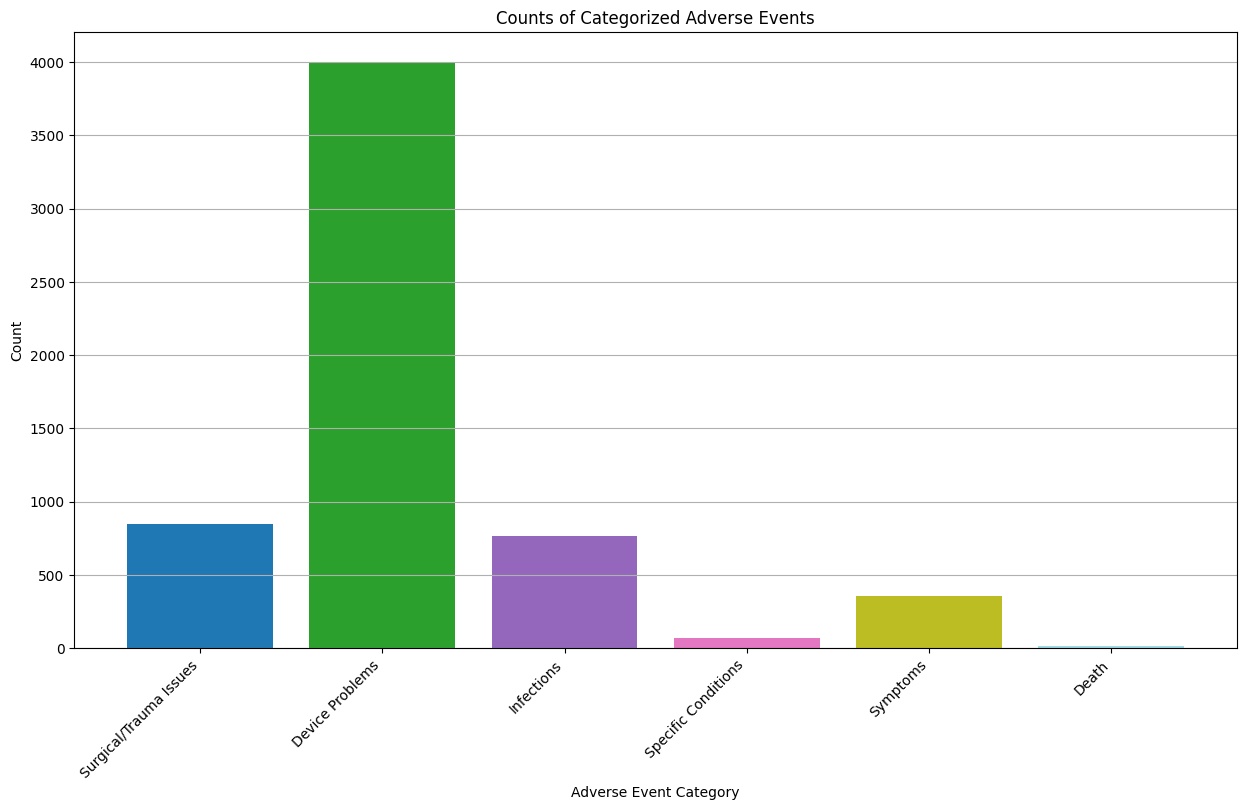

In [ ]:
import matplotlib.cm as cm

# summarize counts for each category
category_counts = defaultdict(int)
for categories in data['CATEGORIZED_EVENTS']:
    for category in categories:
        category_counts[category] += 1

# create a DataFrame for plotting
category_counts_df = pd.DataFrame(list(category_counts.items()), columns=['Category', 'Count'])

cmap = cm.get_cmap('tab20', len(category_counts_df))


colors = [cmap(i) for i in range(len(category_counts_df))]

# bar graph
plt.figure(figsize=(15, 8))
plt.bar(category_counts_df['Category'], category_counts_df['Count'], color=colors)
plt.xlabel('Adverse Event Category')
plt.ylabel('Count')
plt.title('Counts of Categorized Adverse Events')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

<ipython-input-16-bf2812172f17>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', len(category_counts_df))


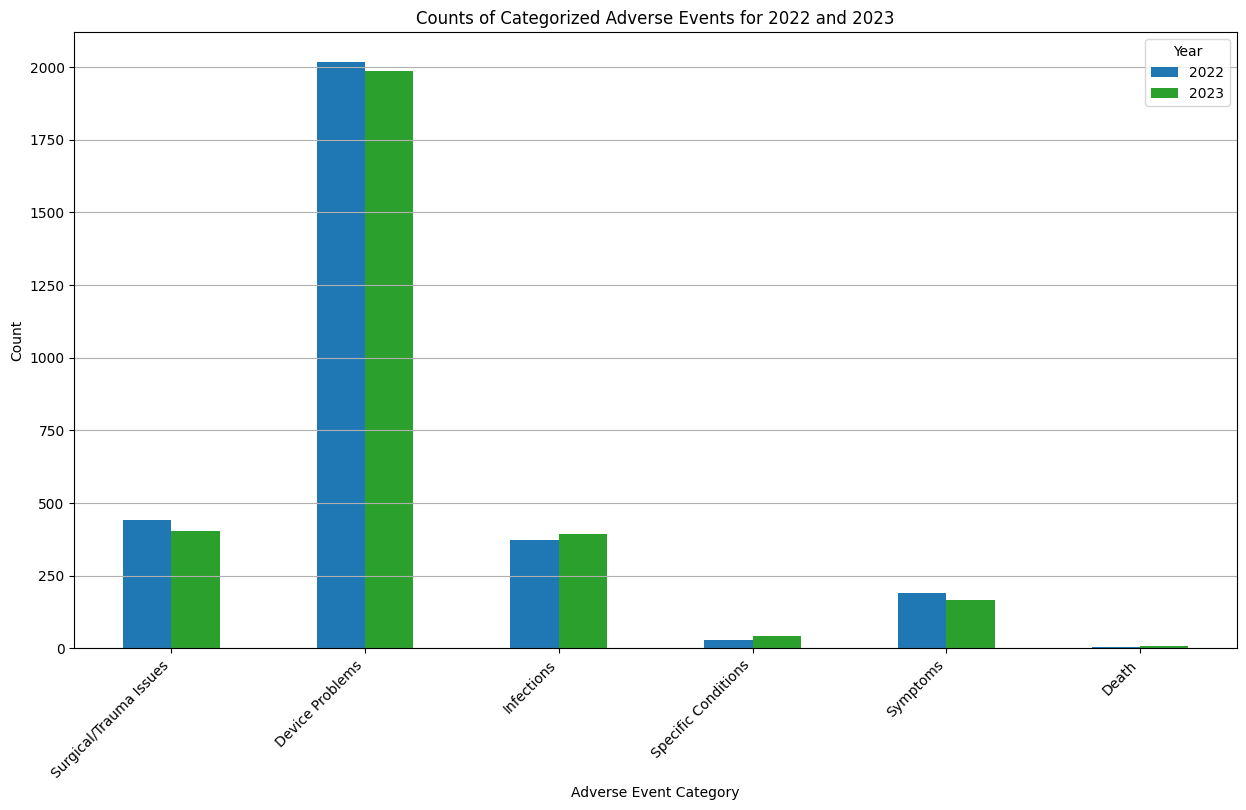

In [ ]:
# converting the DATE_RECEIVED column to datetime format
data['DATE_RECEIVED'] = pd.to_datetime(data['DATE_RECEIVED'], format='%Y/%m/%d')

# data for the years 2022 and 2023
data_2022_2023 = data[data['DATE_RECEIVED'].dt.year.isin([2022, 2023])]

# categorization
data_2022_2023['CATEGORIZED_EVENTS'] = data_2022_2023['ADVERSE_EVENTS'].apply(categorize_adverse_events)

# summarize counts for each category in each year
category_counts_by_year = defaultdict(lambda: defaultdict(int))
for _, row in data_2022_2023.iterrows():
    year = row['DATE_RECEIVED'].year
    for category in row['CATEGORIZED_EVENTS']:
        category_counts_by_year[year][category] += 1

# convert to DataFrame for plotting
category_counts_df = pd.DataFrame(category_counts_by_year).fillna(0)

cmap = cm.get_cmap('tab20', len(category_counts_df))

colors = [cmap(i) for i in range(len(category_counts_df.columns))]

#  bar graph
category_counts_df.plot(kind='bar', figsize=(15, 8), color=colors)
plt.xlabel('Adverse Event Category')
plt.ylabel('Count')
plt.title('Counts of Categorized Adverse Events for 2022 and 2023')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.legend(title='Year')
plt.show()

In [ ]:
# creating a dictionary to hold the counts of each category
category_counts = {category: 0 for category in set(adverse_event_categories.values())}

# Initialize a DataFrame to hold the time series data for each category
time_series_data = pd.DataFrame(index=pd.date_range(start=data['DATE_RECEIVED'].min(), end=data['DATE_RECEIVED'].max(), freq='W-MON'))

# Generate a time series count for each category
for category in set(adverse_event_categories.values()):
    # Filter reports containing the category
    category_data = data[data['ADVERSE_EVENTS'].apply(lambda events: any(adverse_event_categories.get(event) == category for event in events))]

    # Set the DATE_RECEIVED as the index
    category_data = category_data.set_index('DATE_RECEIVED')

    # Count occurrences of the category over time
    category_time_series = category_data.resample('W-MON').size()

    time_series_data[category] = category_time_series

# Calculate the total number of reports for each week
total_reports_time_series = data.set_index('DATE_RECEIVED').resample('W-MON').size()

# Calculate the proportion of categorized reports
proportion_time_series = time_series_data.divide(total_reports_time_series, axis=0)

# Calculate the total number of categorized reports
total_categorized_reports = time_series_data.sum()

# Calculate the total number of reports
total_reports = total_reports_time_series.sum()

# Calculate the proportion of categorized reports by total reports and convert to percentages
proportion_by_category = (total_categorized_reports / total_reports) * 100

# Create a table of the proportions
proportion_table = pd.DataFrame({
    'Total Categorized Reports': total_categorized_reports,
    'Total Reports': total_reports,
    'Proportion (%)': proportion_by_category
})

# Display the table
print(proportion_table)

                        Total Categorized Reports  Total Reports  \
Infections                                  757.0          27172   
Surgical/Trauma Issues                      837.0          27172   
Death                                        12.0          27172   
Specific Conditions                          72.0          27172   
Symptoms                                    354.0          27172   
Device Problems                            3983.0          27172   

                        Proportion (%)  
Infections                    2.785956  
Surgical/Trauma Issues        3.080377  
Death                         0.044163  
Specific Conditions           0.264979  
Symptoms                      1.302812  
Device Problems              14.658472  


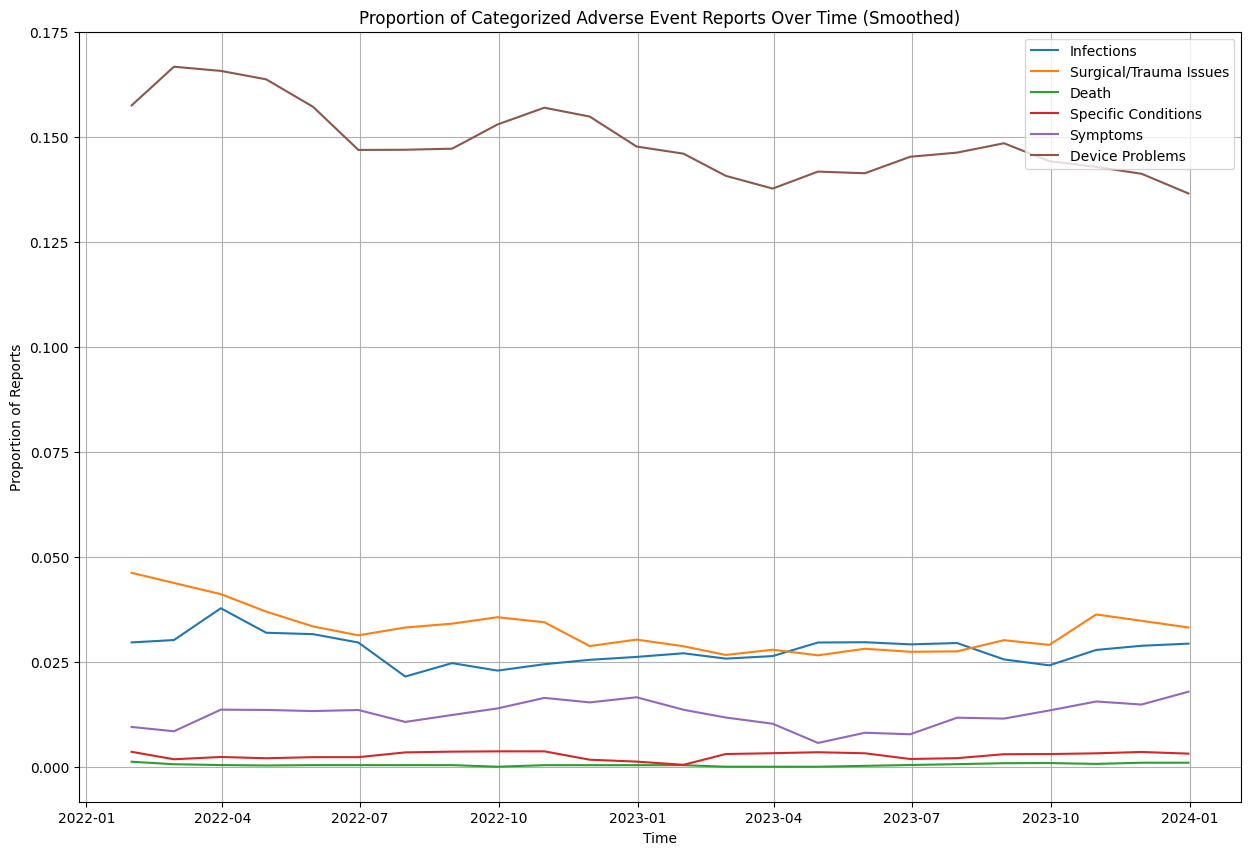

In [ ]:
# Create a dictionary to hold the counts of each category
category_counts = {category: 0 for category in set(adverse_event_categories.values())}

# Initialize a DataFrame to hold the time series data for each category
time_series_data = pd.DataFrame(index=pd.date_range(start=data['DATE_RECEIVED'].min(), end=data['DATE_RECEIVED'].max(), freq='M'))

# Generate a time series count for each category
for category in set(adverse_event_categories.values()):
    # Filter reports containing the category
    category_data = data[data['ADVERSE_EVENTS'].apply(lambda events: any(adverse_event_categories.get(event) == category for event in events))]

    # Set the DATE_RECEIVED as the index
    category_data = category_data.set_index('DATE_RECEIVED')

    # Count occurrences of the category over time
    category_time_series = category_data.resample('M').size()

    time_series_data[category] = category_time_series

# Calculate the total number of reports for each month
total_reports_time_series = data.set_index('DATE_RECEIVED').resample('M').size()

# Calculate the proportion of categorized reports
proportion_time_series = time_series_data.divide(total_reports_time_series, axis=0)

# Apply rolling mean for smoothing
window_size = 4  # Adjust the window size as needed for smoothing
proportion_time_series_smoothed = proportion_time_series.rolling(window=window_size, min_periods=1).mean()

# Plot the smoothed time series data
plt.figure(figsize=(15, 10))

for category in proportion_time_series_smoothed.columns:
    plt.plot(proportion_time_series_smoothed.index, proportion_time_series_smoothed[category], label=category)

plt.xlabel('Time')
plt.ylabel('Proportion of Reports')
plt.title('Proportion of Categorized Adverse Event Reports Over Time (Smoothed)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [ ]:
# Create a dictionary to hold the counts of each keyword
keyword_counts = {keyword: 0 for keyword in adverse_event_categories.keys()}

# Initialize a DataFrame to hold the time series data for each keyword
time_series_data_keywords = pd.DataFrame(index=pd.date_range(start=data['DATE_RECEIVED'].min(), end=data['DATE_RECEIVED'].max(), freq='W-MON'))

# Generate a time series count for each keyword
for keyword in adverse_event_categories.keys():
    # Filter reports containing the keyword
    keyword_data = data[data['ADVERSE_EVENTS'].apply(lambda events: keyword in events)]

    # Set the DATE_RECEIVED as the index
    keyword_data = keyword_data.set_index('DATE_RECEIVED')

    # Count occurrences of the keyword over time
    keyword_time_series = keyword_data.resample('W-MON').size()

    time_series_data_keywords[keyword] = keyword_time_series

# Calculate the total number of reports for each week
total_reports_time_series = data.set_index('DATE_RECEIVED').resample('W-MON').size()

# Calculate the proportion of reports containing each keyword
proportion_time_series_keywords = time_series_data_keywords.divide(total_reports_time_series, axis=0)

# Calculate the total number of reports containing each keyword
total_keyword_reports = time_series_data_keywords.sum()

# Calculate the total number of reports
total_reports = total_reports_time_series.sum()

# Calculate the proportion of reports containing each keyword by total reports and convert to percentages
proportion_by_keyword = (total_keyword_reports / total_reports) * 100

# Create a table of the proportions
proportion_table_keywords = pd.DataFrame({
    'Total Reports with Keyword': total_keyword_reports,
    'Total Reports': total_reports,
    'Proportion (%)': proportion_by_keyword
})

# Display the table
print(proportion_table_keywords)

                               Total Reports with Keyword  Total Reports  \
device failure                                     2332.0          27172   
broken electrode                                    386.0          27172   
severed electrode                                  1257.0          27172   
electrode extrusion                                  55.0          27172   
device migration                                     83.0          27172   
device rejection                                      1.0          27172   
skin infection                                       15.0          27172   
external ear infection                                0.0          27172   
middle ear infection                                 19.0          27172   
ear infection                                        31.0          27172   
flap infection                                       28.0          27172   
mastoiditis                                          15.0          27172   
otitis      